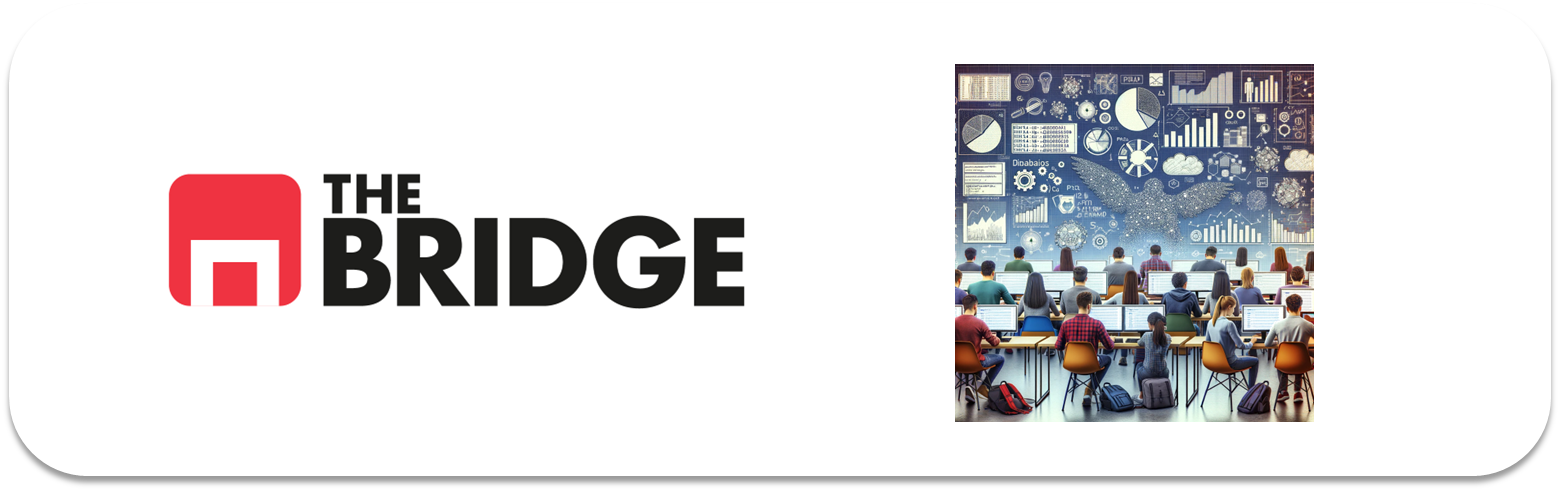

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [267]:
# Importo las librerias que voy a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
# Cargo el dataset
Boston_houses= pd.read_csv('/Users/lauragarcia/REPO_PRUEBA/ONLINE_DS_THEBRIDGE_Curso2025/04_Machine_Learning/Sprint_10/Unidad_01/Practica_Obligatoria/data/hard_to_find/obligatoria_hard.csv', sep='|')
Boston_houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [269]:
# Extisten algunas variables que tienen mucha dispersión entre máximos y minimos como pueden ser CRIM, ZN, DIST

In [270]:
Boston_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


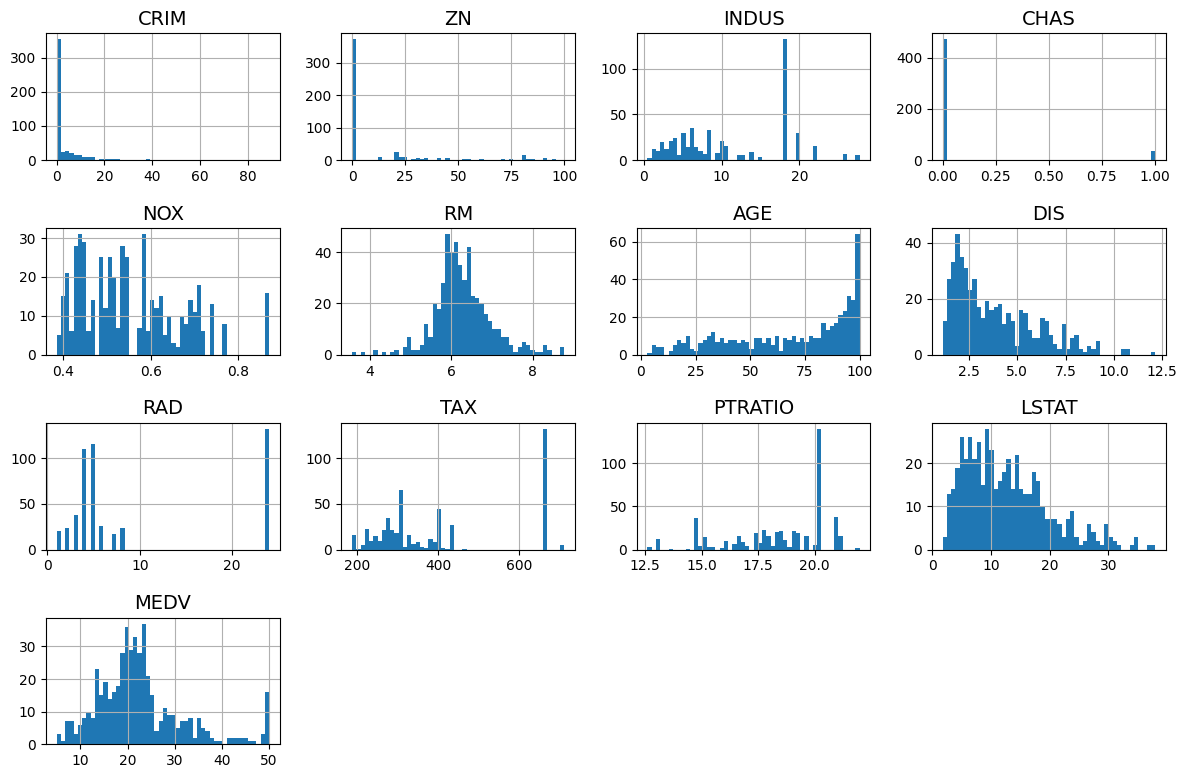

In [271]:
# Echamos un vistazo general a las variables
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Boston_houses.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.tight_layout()
plt.show()

Con estas gráficas vemos que hay valores muy extraños en varias variables, como en RAD que de repente pasamos de menos de 10 a más de 20 sin valores por medio( pueden estar capados?). En las TAX ocurre algo similiar, hay como dos outliers. En CHAS solo hay dos valores( porque está expresado en booleanos), La edad tiene una distribución exponencial. Las que más se parecen a una distribución gaussiana son las habitaciones y puede que la media de precio.

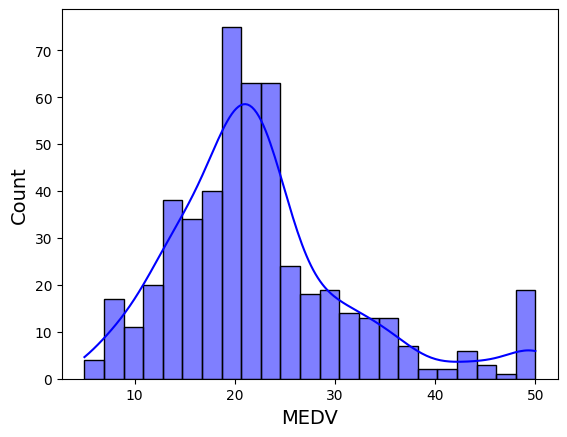

In [272]:
# Escogiendo la variable target. La que más puede ser a priori por los nombres es el valor medio de las viviendas, pero voy a hacer alguna comprobación
sns.histplot(Boston_houses['MEDV'], color='Blue', kde = True)
plt.show()

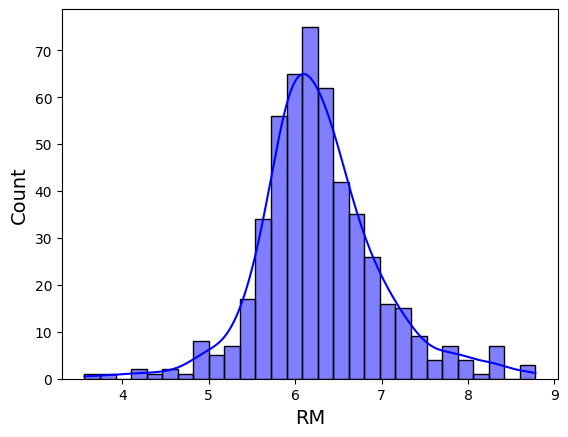

In [273]:
sns.histplot(Boston_houses['RM'], color='Blue', kde = True)
plt.show()

In [274]:
# Se puede asemejar a una campana de Gauss aunque no es simétrica al 100%, creo que me voy a quedar con lel precio medio, ya que es lo mas parecido a lo que me piden

En nuestra checklist:

* Objetivo de negocio [X] check ( Usaremos la variable MDeV, es la que más se puede asemejar a lo nos piden)
* Objetivo tecnico [X] check
* Tipo de modelado (supervisado, no supervisado): SUPERVISADO [X] check
* Features [] pending (aunque tengamos la base no tenemos las defintivas) 
* Target, si hay: 'MEDV' [X] check
* Tipo de problema (clasificación, regresión, etc): Regresión [X] check
* Métrica de Evaluacion [] pending 
* Separación Train-Test [] pending

In [275]:
# Voy a dividir el dataset en train y test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Boston_houses, test_size=0.2, random_state=42)

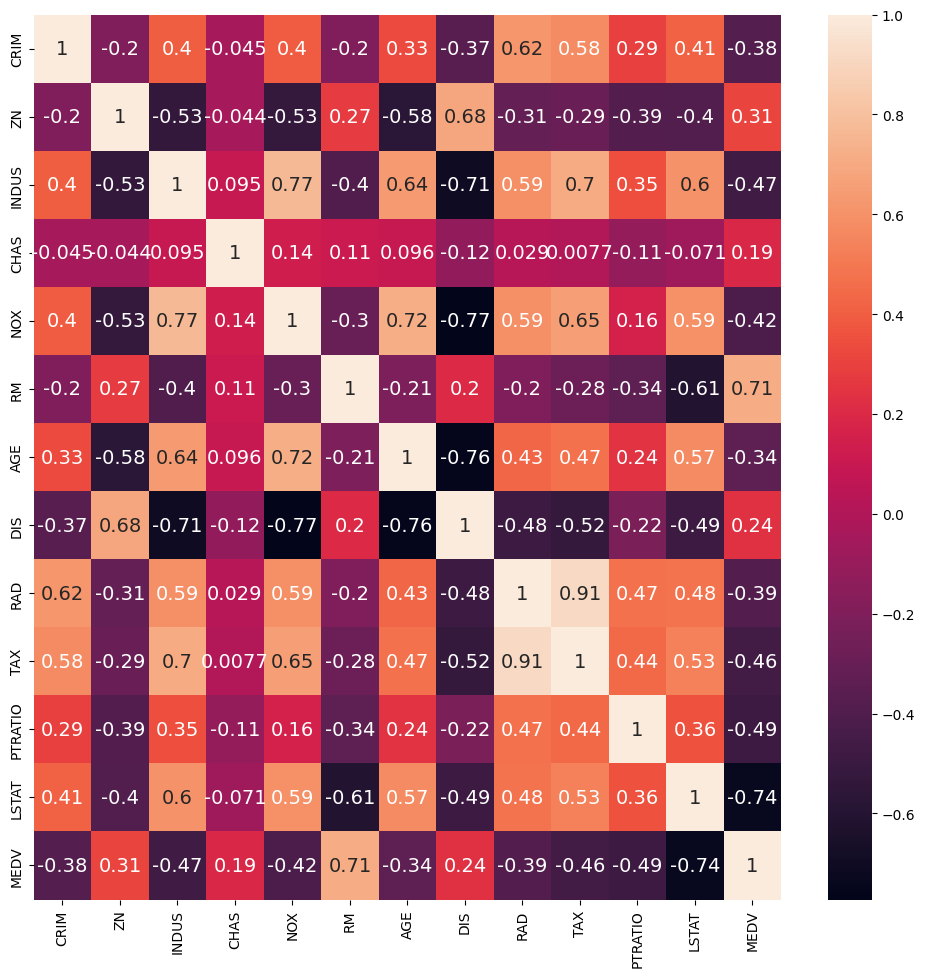

In [276]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(numeric_only = True),annot=True);
plt.tight_layout()
plt.show();

In [277]:
# Parece que tiene buena correlación con RM (0,71), cosa que sospechaba y tiene sentido, con ZN(0,31), con DIS(0,24), chas(0,19) y luego tiene una alta anticoreelación con LSTAD(-0,74), PTRATI0(-0,49), taX8-0,46), indus(-0,47)

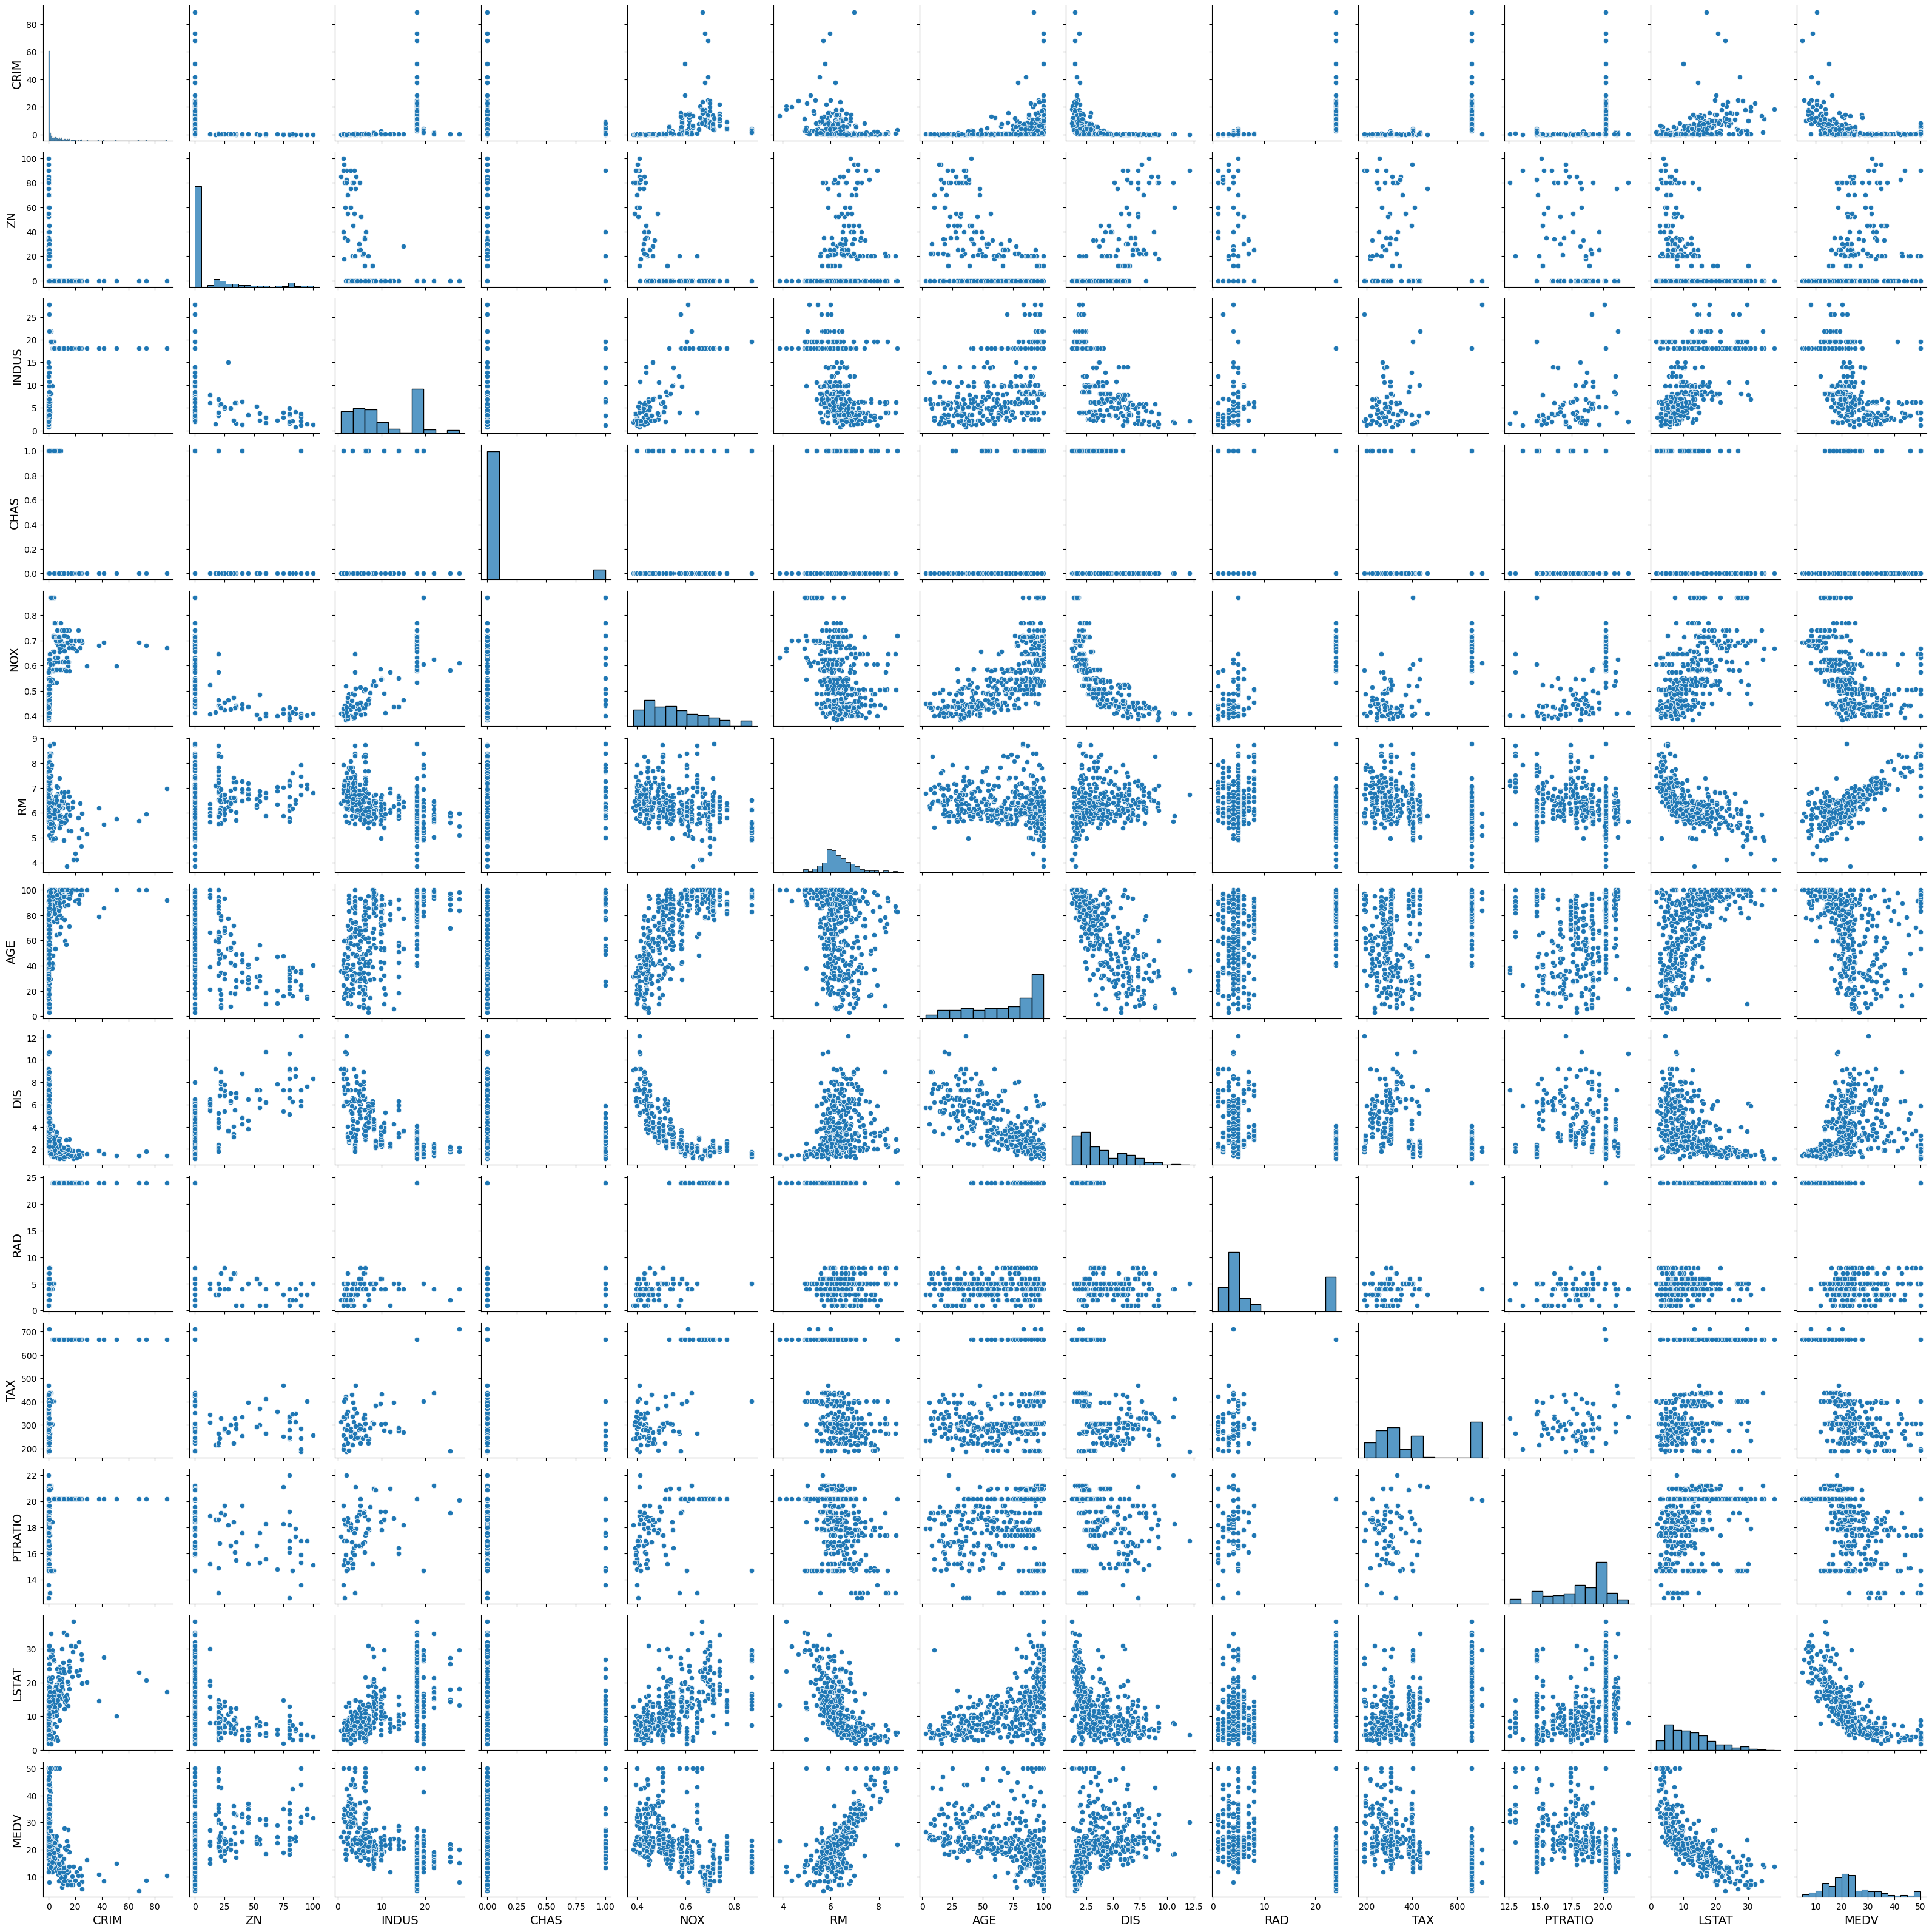

In [278]:
sns.pairplot(train_set)

In [279]:
# Valores de Y que será la target y los valores de X serán las features, voy a ver cuales son las que puedo usar de features antes de crear los valores de X
y = Boston_houses['MEDV']
X = Boston_houses[['RM', 'LSTAT', 'DIS', 'CHAS']]

train_set_X, test_set_X, train_set_y, test_set_y = train_test_split(X, y, test_size = 0.2, random_state=42)
len(train_set)

404

# MINI EDA

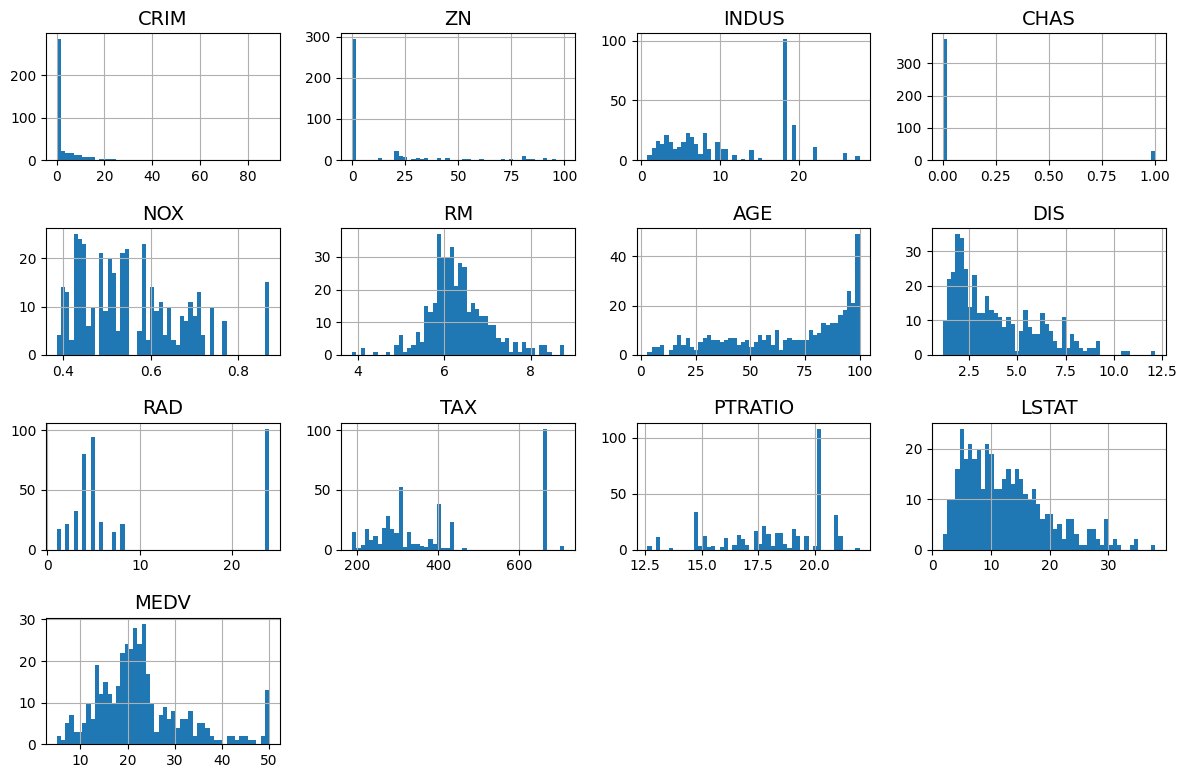

In [280]:
train_set.hist(bins=50, figsize=(12, 8)) 
plt.tight_layout()
plt.show()


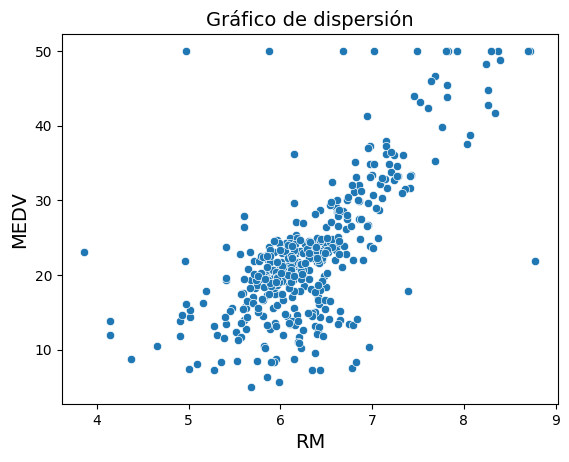

In [281]:
# Voy a ver que relacion tienen las habitaciones con el precio medio de la vivienda
sns.scatterplot(x='RM', y='MEDV', data=train_set)
plt.title('Gráfico de dispersión')
plt.show()

In [282]:
# Parece que tienen mucha relación el precio con las habitaciones

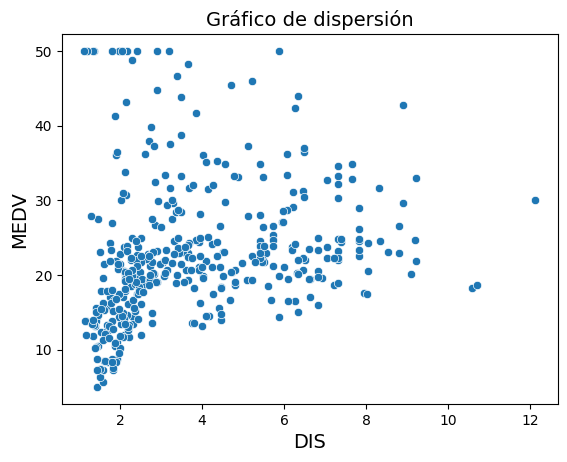

In [283]:
# Voy a ver la relación con las distacias a centros de trabajo
sns.scatterplot(x='DIS', y='MEDV', data=train_set)
plt.title('Gráfico de dispersión')
plt.show()

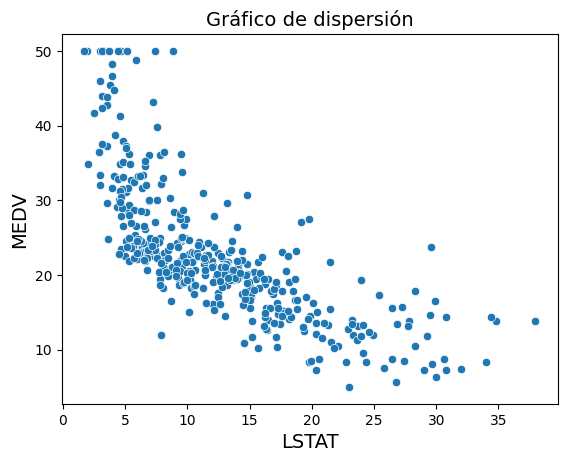

In [284]:
# Parece que es como un árbol. A menor distancia, la variabilidad de precios es mayor, pero podria tener una relacion lineal 
# Voy a ver la relación con la población de bajo estatus económico
sns.scatterplot(x='LSTAT', y='MEDV', data=train_set)
plt.title('Gráfico de dispersión')
plt.show()

In [285]:
# Tiene una relación totalmente inversa, a mayor porcentaje de población de bajo estatus esconómico, menos precio, tiene sentido ya que podran pagar menos


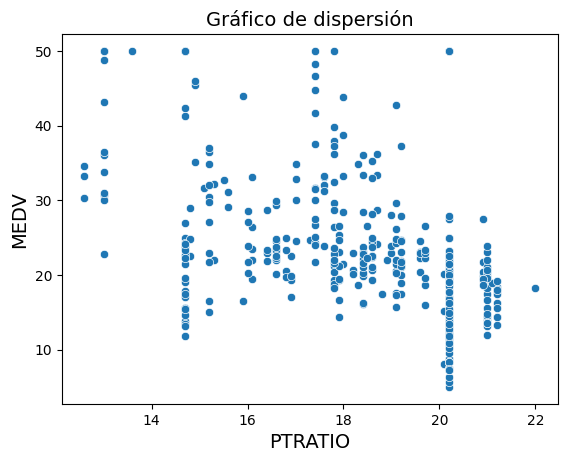

In [286]:
sns.scatterplot(x='PTRATIO', y='MEDV', data=train_set)
plt.title('Gráfico de dispersión')
plt.show()

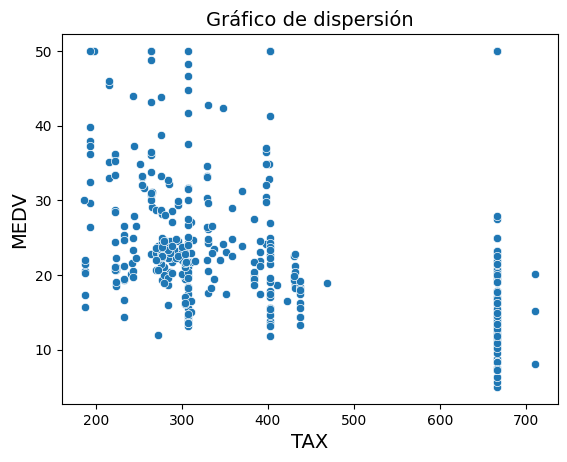

In [287]:
sns.scatterplot(x='TAX', y='MEDV', data=train_set)
plt.title('Gráfico de dispersión')
plt.show()

In [288]:
features= ['RM', 'CHAS']
features_num = ["DIS","LSTAT"]
target = 'MEDV'

In [289]:
# Voy a standarizar las variables numéricas LSTAT y DIS
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set[features_num]),columns = features_num)
resultado_standardization.head()

,DIS,LSTAT
0,-0.802173,1.753505
1,0.324349,-0.561474
2,1.330697,-0.651595
3,-0.839240,1.525387
4,-0.005494,-0.165787


<Axes: >

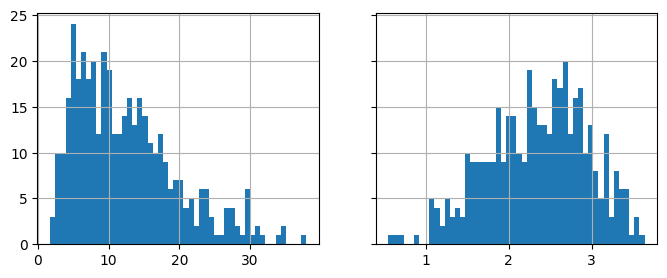

In [290]:
# Creo que queda mejor haciendo los logaritmos
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["LSTAT"].hist(ax=axs[0], bins=50)
train_set["LSTAT"].apply(np.log).hist(ax=axs[1], bins=50)

<Axes: >

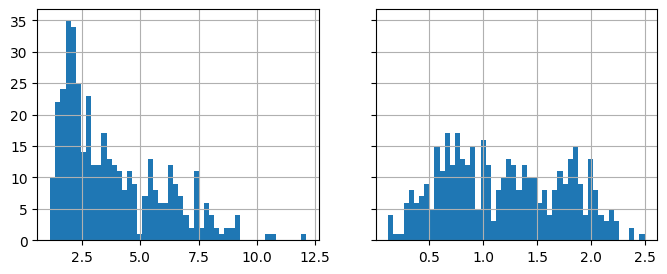

In [291]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["DIS"].hist(ax=axs[0], bins=50)
train_set["DIS"].apply(np.log).hist(ax=axs[1], bins=50)

In [292]:
# APlico la transformacion a las dos variables
for col in ["DIS","LSTAT"]:
    train_set[f"log_{col}"] = train_set[col].apply(np.log)
    

En nuestra checklist:

* Objetivo de negocio [X] check ( Usaremos la variable MDeV, es la que más se puede asemejar a lo nos piden)
* Objetivo tecnico [X] check
* Tipo de modelado (supervisado, no supervisado): SUPERVISADO [X] check
* Features [X]  
* Target, si hay: 'MEDV' [X] check
* Tipo de problema (clasificación, regresión, etc): Regresión [X] check
* Métrica de Evaluacion [] pending 
* Separación Train-Test [] pending

In [293]:
# Modelado
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()


In [307]:
features = ['RM', 'LSTAT', 'DIS', 'CHAS']
target ='MEDV'


In [308]:

X = train_set_X[features].copy() 
y= train_set_y

In [309]:
lin_reg.fit(X,y)

LinearRegression()

In [310]:
# Primero las predicciones
train_pred_lin = lin_reg.predict(X)

In [311]:
train_pred_lin # OJo son medias, no medianas que e slo que nos piden

array([ 9.27940759, 22.61109274, 23.16014771, 14.54399313, 20.372802  ,
       27.67303827, 23.34209245, 25.33488524, 12.6023134 , 21.09455384,
       25.42852315, 24.30990098, 31.44364916, 20.74594328, 33.87258978,
       15.73483734, 20.35533867, 26.69291122, 17.05528376, 26.53607345,
       15.78187712, 23.01568935, 25.68723209, 24.11976218, 25.87426053,
       32.71245712, 24.28803329, 36.01388742,  9.34057783, 25.65725415,
       20.7287257 , 18.65476031,  6.50426313, 24.08804378, 23.59937973,
       29.20385818, 28.71116308, 17.56805271, 19.12000485, 26.28556385,
       20.21871931, 13.30314453,  8.90019831, 23.60663591, 24.09800039,
       18.74411981, 14.59486112, 40.78899047, 21.12785926, 20.07660865,
       27.30097978, 22.58301126, 20.34599779, 24.46579537, 16.91651617,
       26.81761318, 31.81167205, 12.87053612, 21.44560883, 17.66166827,
       21.97996984, 26.49662985, 20.87687416, 24.52906214, 38.46887944,
       18.62494784, 17.93581896, 16.15763006, 20.93262189, 24.06

In [312]:
# Interpretación de pesos

lin_reg.intercept_

np.float64(0.7047418272799746)

In [313]:
lin_reg.coef_

array([ 5.1110849 , -0.70819209, -0.42531707,  3.5193333 ])

In [314]:
# Formato dataframe
coef_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
RM,5.111085
LSTAT,-0.708192
DIS,-0.425317
CHAS,3.519333


In [315]:
# Ahora voy a ver los errores
from sklearn import metrics
# Para el train
pred_train = lin_reg.predict(train_set_X)
print('MAE train', metrics.mean_absolute_error(train_set_y, pred_train))
print('MSE train', metrics.mean_squared_error(train_set_y, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(train_set_y, pred_train)))
print('R2 train', lin_reg.score(train_set_X, train_set_y))

MAE train 3.8753804210639102
MSE train 28.733535081950762
RMSE train 5.360367065971393
R2 train 0.6692481954868448


In [317]:
# Regularización
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(train_set_X, train_set_y)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MSE:", round(metrics.mean_squared_error(train_set_y, ridgeR.predict(train_set_X)),2))
print("Test MSE:", round(metrics.mean_squared_error(test_set_y, ridgeR.predict(test_set_X)),2))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(test_set_y, ridgeR.predict(test_set_X))))

Train MSE sin regularización: 28.73
Test MSE sin regularización: 30.01
Train MSE: 28.83
Test MSE: 29.87
Test RMSE: 5.46522904793561


In [318]:
# Lasso
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(train_set_X, train_set_y)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(train_set_y, lassoR.predict(train_set_X)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(test_set_y, lassoR.predict(test_set_X)))

Train MSE sin regularización: 28.73
Test MSE sin regularización: 30.01
Train MSE: 28.9026
Test MSE: 30.0350


In [327]:
# Empeora los resultados
# Elastic nest
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(train_set_X, train_set_y)

print("Train MSE: %0.4f" % metrics.mean_squared_error(train_set_y, elastic_net.predict(train_set_X)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(test_set_y, elastic_net.predict(test_set_X)))

Train MSE: 29.1819
Test MSE: 29.8260
